In [6]:
gen educ2 = educ^2

In [8]:
reg log_wage educ exper exper2 expereduc


      Source |       SS           df       MS      Number of obs   =     1,000
-------------+----------------------------------   F(4, 995)       =     80.52
       Model |  82.3591698         4  20.5897924   Prob > F        =    0.0000
    Residual |  254.421562       995  .255700062   R-squared       =    0.2445
-------------+----------------------------------   Adj R-squared   =    0.2415
       Total |  336.780731       999  .337117849   Root MSE        =    .50567

------------------------------------------------------------------------------
    log_wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |   .1271953   .0147188     8.64   0.000     .0983118    .1560789
       exper |   .0629807   .0095361     6.60   0.000     .0442676    .0816938
      exper2 |  -.0007139    .000088    -8.11   0.000    -.0008867   -.0005412
   expereduc |  -.0013224   .0004949    -2.67   0.

In [7]:
reg log_wage educ educ2 exper exper2 expereduc


      Source |       SS           df       MS      Number of obs   =     1,000
-------------+----------------------------------   F(5, 994)       =     65.86
       Model |  83.8048542         5  16.7609708   Prob > F        =    0.0000
    Residual |  252.975877       994  .254502895   R-squared       =    0.2488
-------------+----------------------------------   Adj R-squared   =    0.2451
       Total |  336.780731       999  .337117849   Root MSE        =    .50448

------------------------------------------------------------------------------
    log_wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |   .0464182   .0369365     1.26   0.209    -.0260641    .1189006
       educ2 |   .0026509   .0011122     2.38   0.017     .0004683    .0048334
       exper |   .0577752   .0097612     5.92   0.000     .0386203    .0769302
      exper2 |  -.0006946   .0000882    -7.87   0.

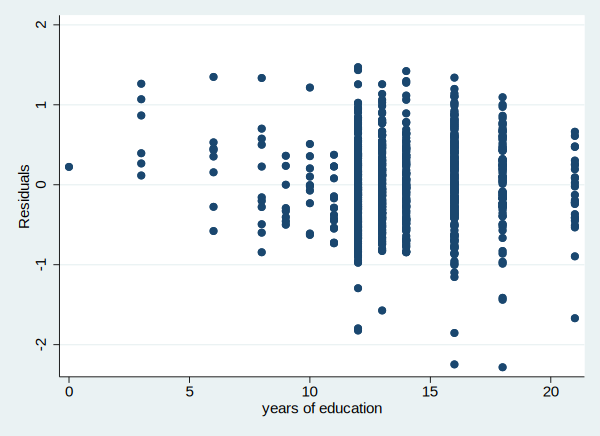

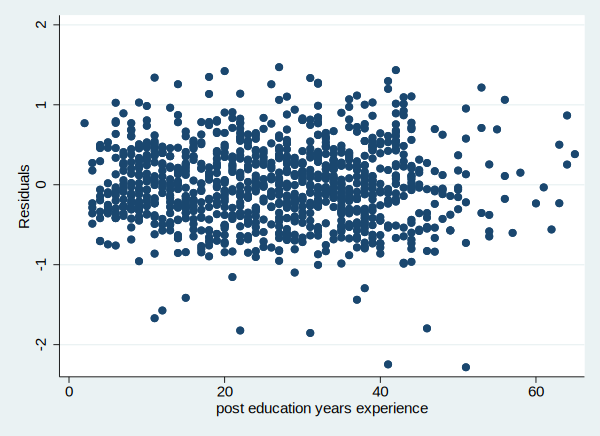

In [1]:
use https://www.stata.com/data/s4poe4/cps4_small.dta
gen log_wage = log(wage)
gen exper2 = exper^2
gen expereduc = exper*educ

reg log_wage educ exper exper2 expereduc
predict residuals, resid

scatter resid educ
scatter resid exper


In [3]:
help hettest

In [4]:
hettest educ exper married


Breusch-Pagan / Cook-Weisberg test for heteroskedasticity 
         Ho: Constant variance
         Variables: educ exper married

         chi2(3)      =    21.29
         Prob > chi2  =   0.0001


In [9]:
gen lnwage = log(wage) 
gen expersq = exper*exper
gen exper_educ = exper*educ

reg lnwage educ exper expersq c.exper#c.educ
predict ehat, r // generating residuals

gen lehat2 = ln(ehat^2) // log of squared residuals to normalize?
reg lehat2 educ exper married  // regressing for variance

gen h = exp(_b[_cons] + _b[educ]*educ + _b[exper]*exper + _b[married]*married) //estimated functional form of the variance//

gen sd = h^(1/2) // standard deviation of estimated variance






      Source |       SS           df       MS      Number of obs   =     1,000
-------------+----------------------------------   F(4, 995)       =     80.52
       Model |  82.3591698         4  20.5897924   Prob > F        =    0.0000
    Residual |  254.421562       995  .255700062   R-squared       =    0.2445
-------------+----------------------------------   Adj R-squared   =    0.2415
       Total |  336.780731       999  .337117849   Root MSE        =    .50567

--------------------------------------------------------------------------------
        lnwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
---------------+----------------------------------------------------------------
          educ |   .1271953   .0147188     8.64   0.000     .0983118    .1560789
         exper |   .0629807   .0095361     6.60   0.000     .0442676    .0816938
       expersq |  -.0007139    .000088    -8.11   0.000    -.0008867   -.0005412
               |
c.exper#c.educ | 

(bin=29, start=-2.2822692, width=.1294191)


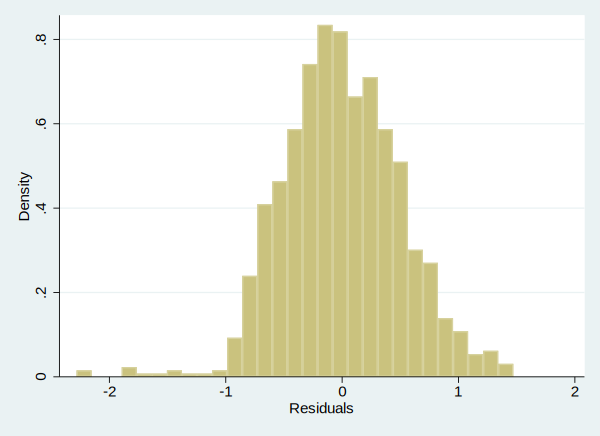

In [15]:
hist ehat



(bin=29, start=1.005e-08, width=.17961218)


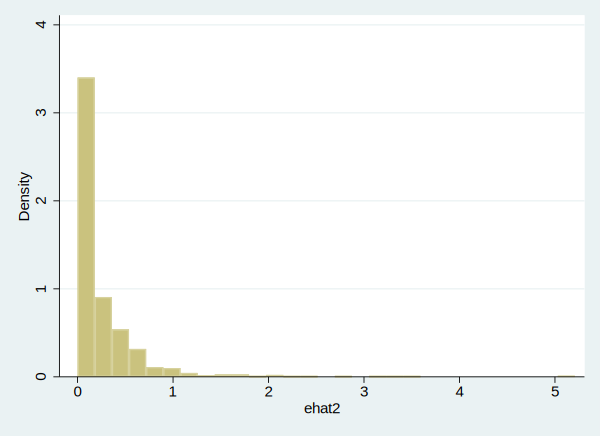

In [16]:
gen ehat2 = ehat^2
hist ehat2


(bin=29, start=-18.415432, width=.69192319)


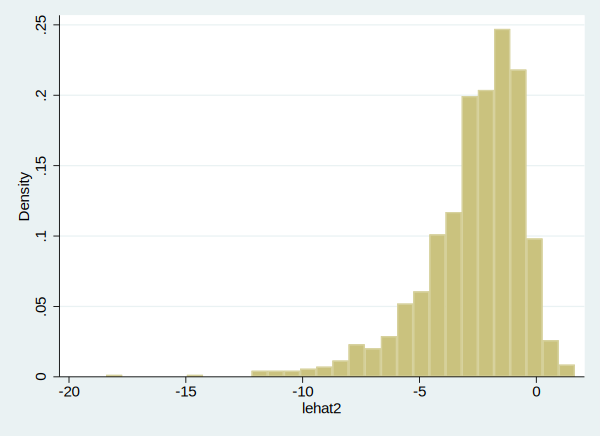

In [17]:
hist lehat2

In [10]:
gen cons_star = 1/sd  
gen educ_star = educ/sd
gen exper_star = exper/sd
gen expersq_star = expersq/sd
gen exper_educ_star = exper_educ/sd
gen lnwage_star = lnwage/sd


// dividing all explanatory and predicted variables by sd because?


reg lnwage_star cons_star educ_star exper_star expersq_star exper_educ_star, nocons 
//GLS unknown variance - manual computation//









      Source |       SS           df       MS      Number of obs   =     1,000
-------------+----------------------------------   F(5, 995)       =   6485.30
       Model |  118300.071         5  23660.0142   Prob > F        =    0.0000
    Residual |  3630.01056       995  3.64825182   R-squared       =    0.9702
-------------+----------------------------------   Adj R-squared   =    0.9701
       Total |  121930.082     1,000  121.930082   Root MSE        =      1.91

---------------------------------------------------------------------------------
    lnwage_star |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
----------------+----------------------------------------------------------------
      cons_star |   .5264823   .2203235     2.39   0.017     .0941302    .9588344
      educ_star |   .1274117   .0143805     8.86   0.000     .0991922    .1556313
     exper_star |   .0636458   .0094352     6.75   0.000     .0451306     .082161
   expersq_star |  -.0007

In [18]:
reg lnwage educ exper expersq c.exper#c.educ [aweight = 1/h]

(sum of wgt is 14,490.9929626922)

      Source |       SS           df       MS      Number of obs   =     1,000
-------------+----------------------------------   F(4, 995)       =     80.88
       Model |  81.4541457         4  20.3635364   Prob > F        =    0.0000
    Residual |  250.501159       995  .251759959   R-squared       =    0.2454
-------------+----------------------------------   Adj R-squared   =    0.2423
       Total |  331.955305       999  .332287593   Root MSE        =    .50176

--------------------------------------------------------------------------------
        lnwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
---------------+----------------------------------------------------------------
          educ |   .1274117   .0143805     8.86   0.000     .0991922    .1556313
         exper |   .0636458   .0094352     6.75   0.000     .0451306    .0821611
       expersq |  -.0007151   .0000887    -8.06   0.000    -.0008893    -.000541
    

In [11]:
hetregress log_wage educ exper exper2 expereduc, het(educ exper married) vce(robust)


Fitting full model:

Iteration 0:   log pseudolikelihood = -728.47262  
Iteration 1:   log pseudolikelihood =  -723.6862  
Iteration 2:   log pseudolikelihood = -723.66235  
Iteration 3:   log pseudolikelihood = -723.66235  

Heteroskedastic linear regression               Number of obs     =      1,000
ML estimation
                                                Wald chi2(4)      =     331.63
Log pseudolikelihood = -723.6623                Prob > chi2       =     0.0000

------------------------------------------------------------------------------
             |               Robust
    log_wage |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
log_wage     |
        educ |   .1283835   .0155293     8.27   0.000     .0979466    .1588203
       exper |   .0641817   .0106484     6.03   0.000     .0433112    .0850522
      exper2 |  -.0007182   .0000892    -8.05   0.000     -.000893   -.0005